<a href="https://colab.research.google.com/github/evegarcianz/UK_Weather/blob/main/UK_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/evegarcianz/UK_Weather

Cloning into 'UK_Weather'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
df = pd.read_csv('/content/UK_Weather/MET_Office_Weather_Data.csv')

In [ ]:
#df[df['station']=='']
df['station'].unique()

array(['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar',
       'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth',
       'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow',
       'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn',
       'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye',
       'shawbury', 'sheffield', 'southampton', 'stornoway', 'tiree',
       'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton'],
      dtype=object)

In [ ]:
from numpy.core.numeric import NaN
df_liver[df_liver['rain'].isna()]
#df_liver[df_liver['tmax'].isna()]
#df_liver[df_liver['tmin'].isna()]



,year,month,tmax,tmin,af,rain,station
27678,2009.0,6.0,19.2,10.9,0.0,NaN,sheffield
27801,2019.0,9.0,18.1,10.5,0.0,NaN,sheffield


In [ ]:
df_liver[df_liver['station']== 'sheffield']

,year,month,tmax,tmin,af,rain,station
27565,2000.0,1.0,7.8,2.7,2.0,49.8,sheffield
27566,2000.0,2.0,8.9,3.3,4.0,72.0,sheffield
27567,2000.0,3.0,10.9,4.2,3.0,43.3,sheffield
27568,2000.0,4.0,11.7,4.2,1.0,153.3,sheffield
27569,2000.0,5.0,16.4,7.6,0.0,63.9,sheffield
...,...,...,...,...,...,...,...
27806,2020.0,2.0,8.9,3.0,1.0,224.6,sheffield
27807,2020.0,3.0,10.6,2.8,4.0,43.6,sheffield
27808,2020.0,4.0,15.6,5.7,1.0,12.4,sheffield
27809,2020.0,5.0,18.4,7.7,1.0,5.4,sheffield


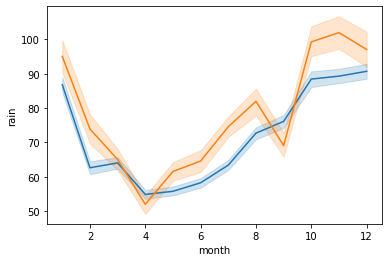

In [ ]:
#plt.figure(figsize=(20,10))
sns.lineplot(x=df['month'],y=df[df['year']<2000]['rain'])
sns.lineplot(x=df['month'],y=df[df['year']>2000]['rain'])

plt.show()

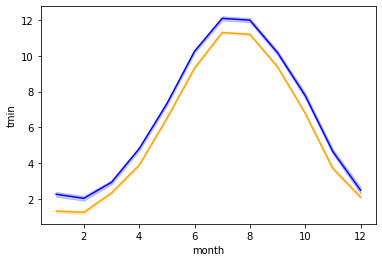

In [ ]:
sns.lineplot(x=df['month'],y=df[df['year']>2000]['tmin'],color='blue')
sns.lineplot(x=df['month'],y=df[df['year']<2000]['tmin'],color='orange')
plt.show()


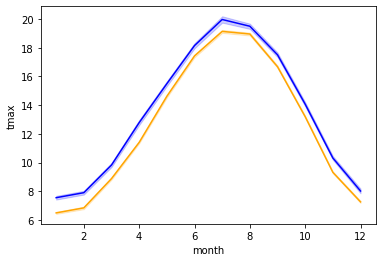

In [ ]:
sns.lineplot(x=df['month'],y=df[df['year']>2000]['tmax'],color='blue')
sns.lineplot(x=df['month'],y=df[df['year']<2000]['tmax'],color='orange')
plt.show()

In [ ]:
near_stations = (df['station'] == 'shawbury') | (df['station'] == 'sheffield')
from_2005=  (df['year'] >= 2000)


In [ ]:
df_liver=df[near_stations & from_2005]
df_liver=df_liver.drop('sun',axis=1)


In [ ]:
df_liver=df_liver.fillna(method='ffill')

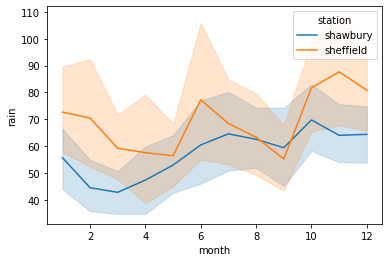

In [ ]:
sns.lineplot(x=df_liver['month'],y=df_liver['rain'],hue=df_liver['station'])
plt.show()

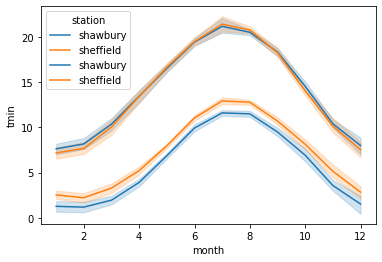

In [ ]:
sns.lineplot(x=df_liver['month'],y=df_liver['tmin'],hue=df_liver['station'])
sns.lineplot(x=df_liver['month'],y=df_liver['tmax'],hue=df_liver['station'])
plt.show()
